# Bias vs Variance and Polynomial Regression

## 1. Regularized Linear Regression
In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir.

### 1.1 Visualizing the data
The dataset is divided into 3 parts:
1) A training set X and y

2) A cross validation set for determining the regularization parameter: Xval, yval

3) A test set for evaluating performance: Xtest, ytest

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [30]:
from scipy.io import loadmat

data = loadmat('ex5data1.mat')

# X, y are all 2d ndarrays
X = data["X"]   
y = data["y"]
Xval = data["Xval"]   
yval = data["yval"]
Xtest = data["Xtest"]   
ytest = data["ytest"]

In [31]:
print(y.shape)

(12, 1)


In [32]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Text(0,0.5,'Water flowing out of the dam (y)')

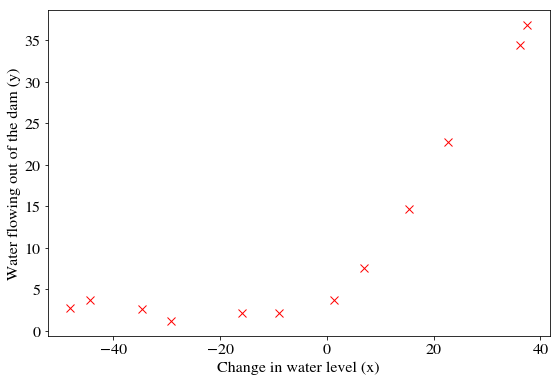

In [33]:
# plot the data in training sample
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

### 1.2 Regularized linear regression cost function

Recall that regularized linear regression has the following cost function:

$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus help preventing overfitting). The regularization term puts a penalty on the overal cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term.

#### Vectorization

$$J(\theta) = \frac{1}{2m}(X\theta-y)^T(X\theta-y) + \frac{\lambda}{2m}\theta_{1-n}^T\theta_{1-n}$$

$\theta_{1-n}$ in the second term does not contain bias term

### 1.3 Regularized linear regression gradient
Correspondingly, the partial derivative of regularized linear regression's cost for $\theta_j$ is defined as:

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)})-y{(i)})x_j^{(i)} \qquad for\;j=0$$

$$ \frac{\partial J(\theta)}{\partial \theta_j}=\left( \frac{1}{m} \sum_{i=0}^m(h_\theta(x^{(i)})-y{(i)})x_j^{(i)}\right)+\frac{\lambda}{m}\theta_j \qquad for\;j\geq 1$$


#### Vectorization
$$ \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} X^T(X\theta-y) \qquad for\;j=0$$

$$ \frac{\partial J(\theta)}{\partial \theta}=\frac{1}{m} X^T(X\theta-y)+\frac{\lambda}{m}\theta \qquad for\;j\geq1$$

In [34]:
def linearRegCostFunction(theta, X, y, lmd):
    """Computes the cost using theta as the parameter for linear regression to fit the 
       data points in X and y. Returns the cost in J and the gradient in grad.
       X should already include bias term (intercept term)
       X, y are 2d ndarrays
       theta is 1d ndarray
       lmd is a scalar
    """
    # number of samples
    m = len(y)
    
    # convert theta to 2d vector, prepare for matrix multiplication
    theta = theta[:, np.newaxis]
    
#     # debugging
#     print("This is within linearRegCostFunction. ")
#     print("Shape of X is {}".format(X.shape))
#     print("Shape of theta is {}".format(theta.shape))
    
    # Cost function
    # Note that theta[1:, :] will preserve its dimension, still 2d array, 
    # even if it may just contain one element.
    # J is a 2d array with only one element
    J = (X@theta-y).T@(X@theta-y)/2/m + theta[1:, :].T@theta[1:, :]*lmd/2/m
    
    # Gradient
    grad = 1 / m * X.T @ (X@theta-y)
    grad[1:, :] += lmd / m * theta[1:, :]
    
    # return J as a number and grad as 1d array in order to use in scipy's minimize function
    return J[0, 0], grad.flatten()

In [35]:
# Test cost function
# add bias terms to X 
m, n = X.shape
X_wb = np.concatenate((np.ones((m, 1)), X), axis=1)

lmd = 1
theta0 = np.array([1, 1])

J, grad = linearRegCostFunction(theta0, X_wb, y, lmd)

print(J)
print("Expected ~303.993192")
print(grad)
print("Expected: [ -15.30301567  598.25074417]")

303.99319222
Expected ~303.993192
[ -15.30301567  598.25074417]
Expected: [ -15.30301567  598.25074417]


### 1.4 Fitting linear regression using minimize function




In [36]:
from scipy.optimize import minimize

# initial conidition, 1d array
# n is number of features, in this case, n=1
theta0 = np.zeros(n+1)

lmd = 0

# run optimization
result = minimize(linearRegCostFunction, theta0, args=(X_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
print(result)

     fun: 22.373906495108912
     jac: array([ -3.04942560e-09,  -4.20907605e-09])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 9
     nit: 4
  status: 0
 success: True
       x: array([ 13.08790351,   0.36777923])


Text(0,0.5,'Water flowing out of the dam (y)')

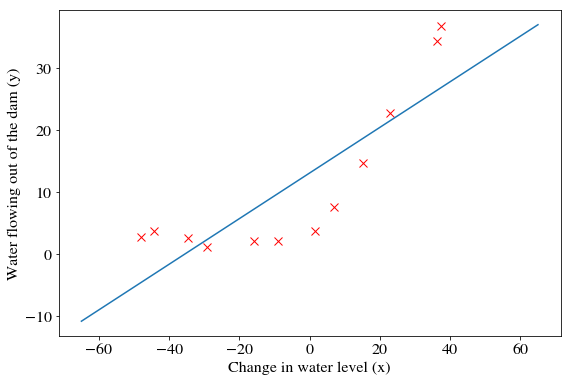

In [37]:
# visualizing result
# theta is 1d ndarray
theta = result.x

# set x range and predicted y for fitting curve
Xp = np.linspace(-65, 65, 51)[:, np.newaxis]
mp = Xp.shape[0]
Xp_wb = np.concatenate((np.ones((mp, 1)), Xp), axis=1)
yp = Xp_wb @ theta[:, np.newaxis]

# plot
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8)
ax.plot(Xp, yp)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

## 2 Bias vs. Variance
An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. 

### 2.1 Learning curves
To plot the learning curve, we need a training and cross validation set error for different training set sizes. 

Recall that the training error for a dataset is defined as: 

$$ J_{train}(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

Note that regularization term is not included. 

When you are computing the training set error, make sure you compute it on the training subset (i.e., X(1:n,:) and y(1:n)) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set.

In [38]:
def learningCurve(X, y, Xval, yval, lmd):
    """returns the train and cross validation set errors for a learning curve. In particular, 
        it returns two vectors of the same length - error_train and 
        error_val. Then, error_train(i) contains the training error for
        i-th examples (and similarly for error_val(i)).
        
        X and Xval should already has bias items
        X, y, Xval, yval are all 2d ndarrays
        lmd is a number
    """
    
    # 
    # debug codes
#     print("This is within learningCurve. ")
#     print("Shape of X is {}".format(X.shape))
#     print("Shape of Xval is {}".format(Xval.shape))
    
    
    # number of samples in training set
    m = len(y)
    
    # number of samples in validation set
    n = len(yval)
    
    # init theta, 1d array
    theta0 = np.zeros(X.shape[1])
    
    # init error array, 1d
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    # loop through number of training examples
    for i in range(m):
        
        result = minimize(linearRegCostFunction, theta0, args=(X[:(i+1), :], y[:(i+1), :], lmd), method='TNC', jac=True, options={'disp': True})
        theta = result.x[:, np.newaxis]
        
        error_train[i] = ((X[:(i+1), :]@theta-y[:(i+1), :]).T@(X[:(i+1), :]@theta-y[:(i+1), :])/2/(i+1))[0, 0]
        error_val[i] = ((Xval@theta-yval).T@(Xval@theta-yval)/2/n)[0, 0]
        
    return error_train, error_val

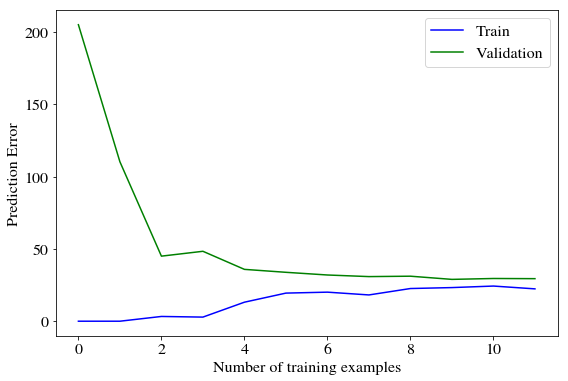

In [39]:
# plot learning curve

lmd = 0

# add bias terms to Xval
mval = len(yval)
Xval_wb = np.concatenate((np.ones((mval, 1)), Xval), axis=1)

# calculate error
error_train, error_val = learningCurve(X_wb, y, Xval_wb, yval, lmd)

# plot learning curve
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(np.arange(m), error_train, 'b', label='Train')
ax.plot(np.arange(m), error_val, 'g', label='Validation')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Prediction Error')
ax.legend()

Both the train error and cross validation error are high when the number of training examples is increased. This
reflects a high bias problem in the model. The linear regression model is too simple to fit the dataset well. 

## 3 Polynomial regression

Introduction to be added.

In [40]:
def polyFeatures(X, p):
    """takes a data matrix X (size m x 1, 2d array) and
%   maps each example into its polynomial features where
%   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    """
    
    X_poly = np.zeros((X.shape[0], p))
    
    for i in range(p):
        X_poly[:, i] = X[:, 0] ** (i+1)
        
    return X_poly       

### 3.1 Learning Polynomial Regression

Feature normalization function is same as in assignment 1. 

In [41]:
def featureNormalize(X):
    """returns a normalized version of X where
       the mean value of each feature is 0 and the standard deviation
       is 1. This is often a good preprocessing step to do when
       working with learning algorithms.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1) # note that adding ddof=1 (delta degree of freedom) will calculate unbiased std. 
    X_norm = (X - mu) / sigma # broadcasting in use
    
    return X_norm, mu, sigma

In [42]:
# order of polynomial feature
p = 8

# map feature and normalize for
# note that all set needs to be normalized using same mu and sigma, i.e. training set's mu and sigma
# 1) training set
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)
X_poly_wb = np.concatenate((np.ones((m, 1)), X_poly), axis=1)

# 2) Cross Validation set
Xval_poly = polyFeatures(Xval, p)
Xval_poly = (Xval_poly - mu) / sigma   # broadcasting in use, Xval_poly is (mval, p), mu and sigma are (p,)
Xval_poly_wb = np.concatenate((np.ones((mval, 1)), Xval_poly), axis=1)

# 3) test set
mtest = Xtest.shape[0]
Xtest_poly = polyFeatures(Xtest, p)
Xtest_poly = (Xtest_poly - mu) / sigma   # broadcasting in use, Xtest_poly is (mtest, p), mu and sigma are (p,)
Xtest_poly_wb = np.concatenate((np.ones((mtest, 1)), Xtest_poly), axis=1)

Text(0.5,1,'$\\lambda = 0$')

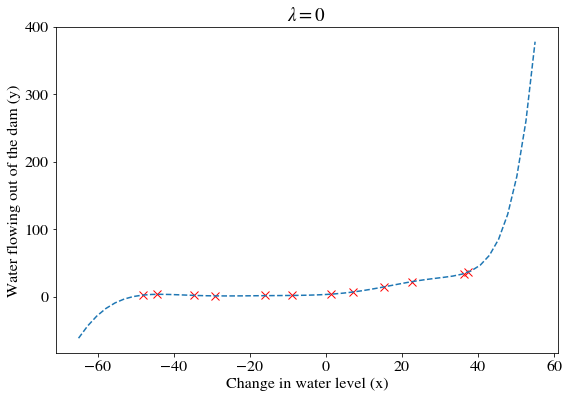

In [43]:
# Learning polynomial regression
lmd = 0
init_theta = np.zeros(p+1)

result = minimize(linearRegCostFunction, init_theta, args=(X_poly_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
theta = result.x

# visualizing result

# set x range and predicted y for fitting curve
Xp = np.linspace(-65, 55, 51)[:, np.newaxis]
# print(Xp.shape)
mp = Xp.shape[0]
Xp_poly = polyFeatures(Xp, p)
Xp_poly = (Xp_poly - mu) / sigma # need to use mu, sigma of the training sample to normalize this set
Xp_poly_wb = np.concatenate((np.ones((mp, 1)), Xp_poly), axis=1) 

yp = Xp_poly_wb @ theta[:, np.newaxis]

# plot
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8)
ax.plot(Xp, yp, '--', markersize=10)
# ax.plot(X, X_poly_wb@theta[:, np.newaxis], 'go', markersize=8)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.set_title('$\lambda = {}$'.format(lmd))

### 3.2 Adjusting the regularization parameter

#### $\lambda=1$


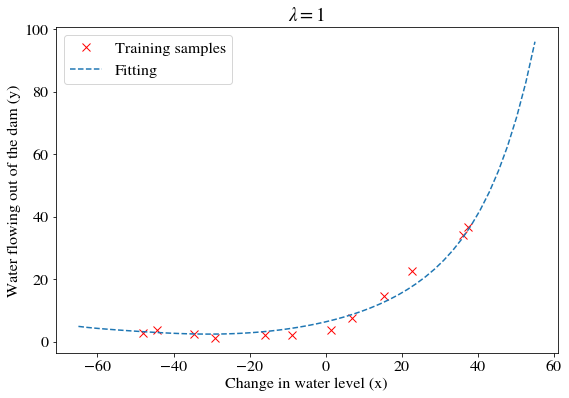

In [44]:
# Learning polynomial regression
lmd = 1
init_theta = np.zeros(p+1)

result = minimize(linearRegCostFunction, init_theta, args=(X_poly_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
theta = result.x

# visualizing result

# predicted y
Xp = np.linspace(-65, 55, 51)[:, np.newaxis]
mp = Xp.shape[0]
Xp_poly = polyFeatures(Xp, p)
Xp_poly = (Xp_poly - mu) / sigma # need to use mu, sigma of the training sample to normalize this set
Xp_poly_wb = np.concatenate((np.ones((mp, 1)), Xp_poly), axis=1) 

yp = Xp_poly_wb@theta[:, np.newaxis]

# plot
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8, label='Training samples')
ax.plot(Xp, yp, '--', markersize=10, label='Fitting')
# ax.plot(X, X_poly_wb@theta[:, np.newaxis], 'go', markersize=8)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.set_title('$\lambda = {}$'.format(lmd))
ax.legend()

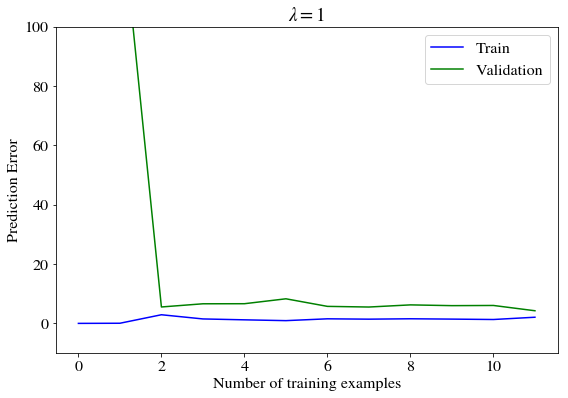

In [45]:
# plot learning curve
# calculate error
error_train, error_val = learningCurve(X_poly_wb, y, Xval_poly_wb, yval, lmd)

# plot learning curve
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(np.arange(m), error_train, 'b', label='Train')
ax.plot(np.arange(m), error_val, 'g', label='Validation')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Prediction Error')
ax.set_title('$\lambda = {}$'.format(lmd))
ax.set_ylim(-10, 100)
ax.legend()

From the learning curve, we can see that both the cross validation and training error converge to a relatively low value. This shows the $\lambda = 1$ regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

#### $\lambda=100$

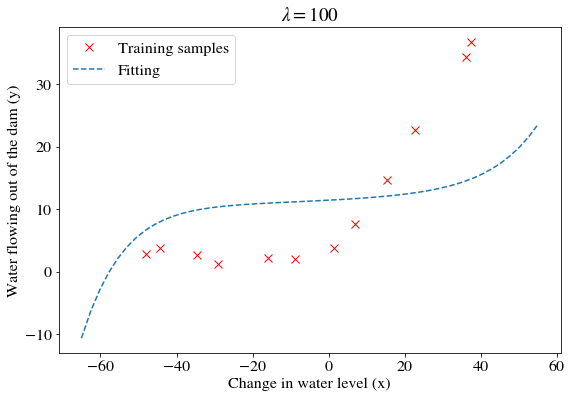

In [46]:
# Learning polynomial regression
lmd = 100
init_theta = np.zeros(p+1)

result = minimize(linearRegCostFunction, init_theta, args=(X_poly_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
theta = result.x

# visualizing result

# predicted y
Xp = np.linspace(-65, 55, 51)[:, np.newaxis]
mp = Xp.shape[0]
Xp_poly = polyFeatures(Xp, p)
Xp_poly = (Xp_poly - mu) / sigma # need to use mu, sigma of the training sample to normalize this set
Xp_poly_wb = np.concatenate((np.ones((mp, 1)), Xp_poly), axis=1) 

yp = Xp_poly_wb@theta[:, np.newaxis]

# plot
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8, label='Training samples')
ax.plot(Xp, yp, '--', markersize=10, label='Fitting')
# ax.plot(X, X_poly_wb@theta[:, np.newaxis], 'go', markersize=8)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.set_title('$\lambda = {}$'.format(lmd))
ax.legend()

When $\lambda=100$, this is clearly an underfit--there is too much regularization that the model is unable to fit the training data well.

### 3.3 Selecting $\lambda$ using a cross validation set

In [47]:
def validationCurve(X, y, Xval, yval, lmd_vec):
    """Generate the train and validation errors needed to
%       plot a validation curve that we can use to select lambda. 
        returns the train
%       and validation errors (in error_train, error_val)
%       for different values of lambda. You are given the training set (X,
%       y) and validation set (Xval, yval).
    """
    
    # init
    m = len(lmd_vec)
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    
    theta0 = np.zeros(X.shape[1])
    
    # training and val set sample numbers
    n_train = X.shape[0]
    n_val = Xval.shape[0]
    
    # loop through each lambda
    for i, lmd in enumerate(lmd_vec):
        
        # learning from training set
        result = minimize(linearRegCostFunction, theta0, args=(X, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
        theta = result.x[:, np.newaxis]
        
        # train set error
        error_train[i] = ((X@theta-y).T@(X@theta-y)/2/n_train)[0, 0]
        error_val[i] = ((Xval@theta-yval).T@(Xval@theta-yval)/2/n_val)[0, 0]
        
    return error_train, error_val

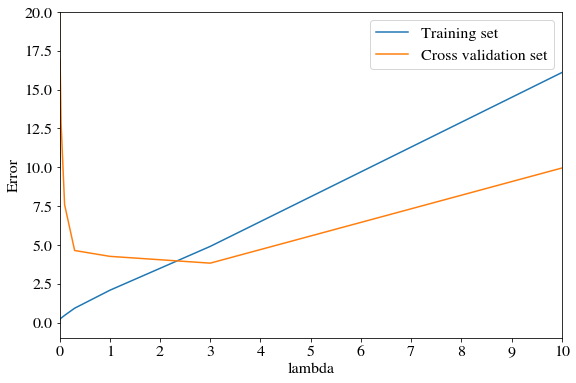

In [48]:
# lambda vector
lmd_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

# try to train and get data
error_train, error_val = validationCurve(X_poly_wb, y, Xval_poly_wb, yval, lmd_vec)

# plot
fig, ax = plt.subplots(figsize=(9, 6))

ax.plot(lmd_vec, error_train, label='Training set')
ax.plot(lmd_vec, error_val, label='Cross validation set')
ax.set_xlabel('lambda')
ax.set_ylabel('Error')
ax.set_xticks(np.arange(0, 12, 1.0))
ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
ax.legend()

We can see that the best value of $\lambda$ is around 3, which minimizes the cross validation error.

#### Visualizing curve fitting and learning curve for $\lambda=3$

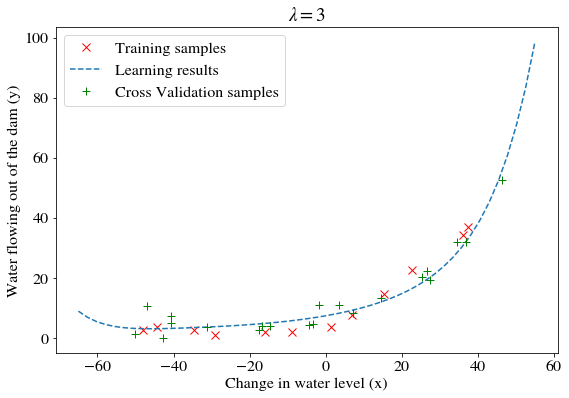

In [49]:
# Learning polynomial regression
lmd = 3
init_theta = np.zeros(p+1)

result = minimize(linearRegCostFunction, init_theta, args=(X_poly_wb, y, lmd), method='TNC', jac=True, options={'disp': True, 'maxiter':200})
theta = result.x

# visualizing result

# predicted y
Xp = np.linspace(-65, 55, 51)[:, np.newaxis]
mp = Xp.shape[0]
Xp_poly = polyFeatures(Xp, p)
Xp_poly = (Xp_poly - mu) / sigma # need to use mu, sigma of the training sample to normalize this set
Xp_poly_wb = np.concatenate((np.ones((mp, 1)), Xp_poly), axis=1) 

yp = Xp_poly_wb@theta[:, np.newaxis]

# plot
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(X, y, 'rx', markersize=8, label='Training samples')
ax.plot(Xp, yp, '--', markersize=10, label='Learning results')
ax.plot(Xval, yval, 'g+', markersize=8, label='Cross Validation samples')
# ax.plot(X, X_poly_wb@theta[:, np.newaxis], 'go', markersize=8)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.set_title('$\lambda = {}$'.format(lmd))
ax.legend()

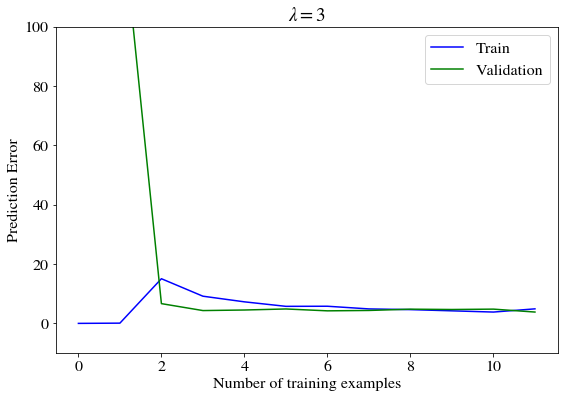

In [50]:
# plot learning curve
# calculate error
error_train, error_val = learningCurve(X_poly_wb, y, Xval_poly_wb, yval, lmd)

# plot learning curve
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(np.arange(m), error_train, 'b', label='Train')
ax.plot(np.arange(m), error_val, 'g', label='Validation')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Prediction Error')
ax.set_title('$\lambda = {}$'.format(lmd))
ax.set_ylim(-10, 100)
ax.legend()

### 3.4 Compute test set error

In [51]:
# prepare theta for matrix multiplication
theta = theta.flatten()
theta = theta[:, np.newaxis]

# test set error
error_test = ((Xtest_poly_wb@theta-ytest).T@(Xtest_poly_wb@theta-ytest)/2/len(ytest))[0, 0]

print(error_test)
print("Expected: 3.8599 for lambda=3")

3.85990556277
Expected: 3.8599 for lambda=3
